Prepared by: Alex J Mathew (Reg No: MLM22AIM009)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.2714 - loss: 2.0440 - val_accuracy: 0.3779 - val_loss: 1.7235
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.3905 - loss: 1.6959 - val_accuracy: 0.4368 - val_loss: 1.5953
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.4288 - loss: 1.6002 - val_accuracy: 0.4441 - val_loss: 1.5662
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.4465 - loss: 1.5397 - val_accuracy: 0.4618 - val_loss: 1.4941
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.4685 - loss: 1.4833 - val_accuracy: 0.4392 - val_loss: 1.5679
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.4758 - loss: 1.4634 - val_accuracy: 0.4825 - val_loss: 1.4550
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.4972 - loss: 1.4087 - val_accuracy: 0.4744 - val_loss: 1.4716
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.4990 - loss: 1.3937 - 

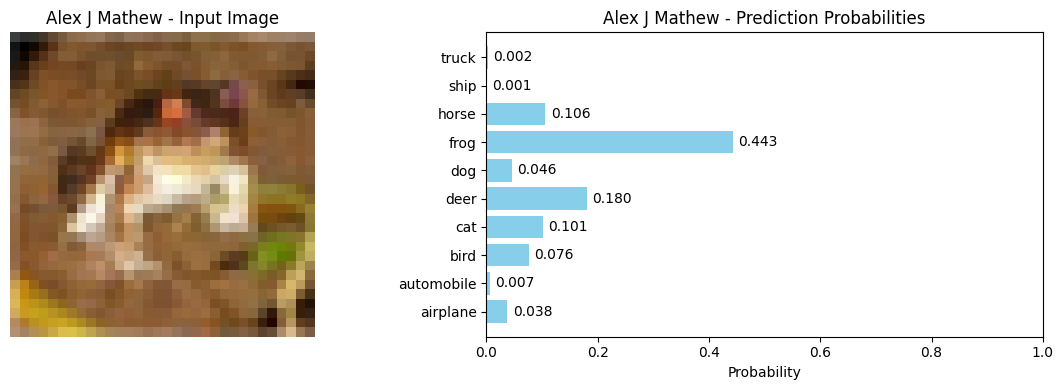

Prediction for image 2:
Predicted:truck(confidence:0.677)


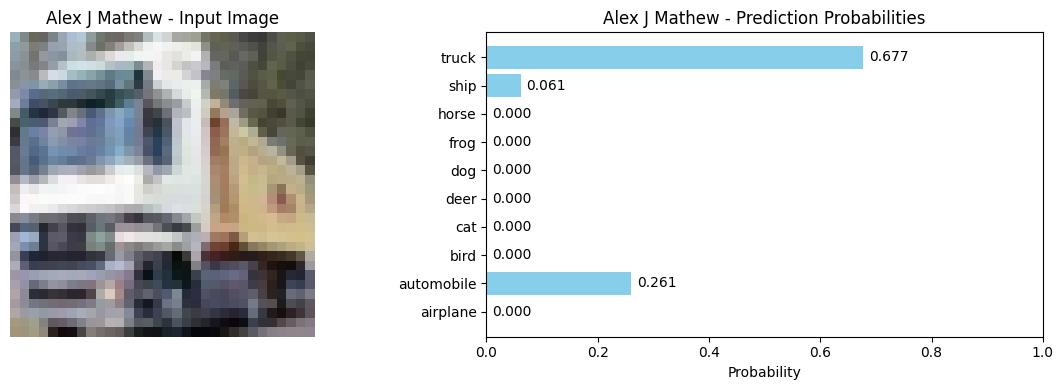

Prediction for image 3:
Predicted:truck(confidence:0.967)


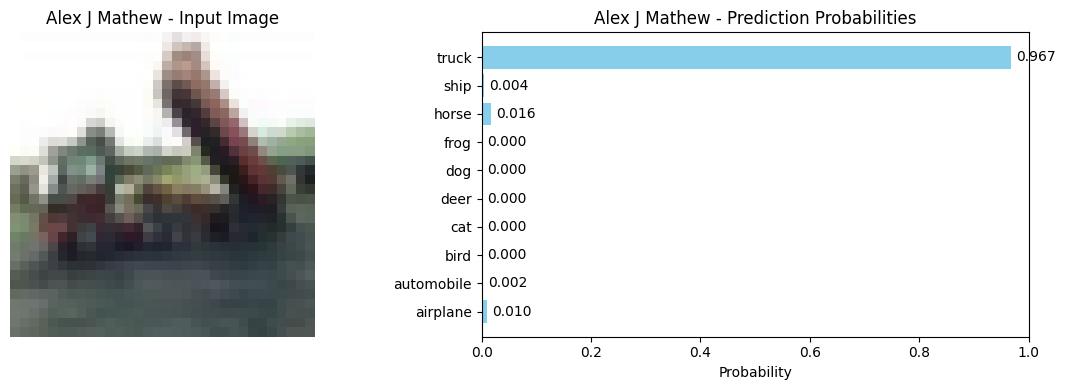

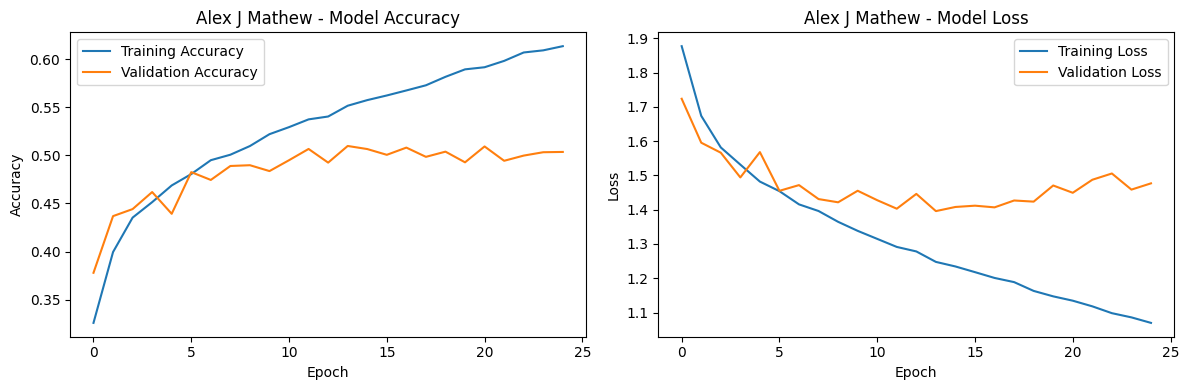

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
y_train,y_test=to_categorical(y_train),to_categorical(y_test)
def create_model(hidden_units=None,activation=None):
    if hidden_units is None:hidden_units=[512,256,128]
    if activation is None:activation='relu'
    model=models.Sequential([layers.Flatten(input_shape=(32,32,3)),layers.Dense(hidden_units[0],activation=activation),layers.Dense(hidden_units[1],activation=activation),layers.Dense(hidden_units[2],activation=activation),layers.Dense(10,activation='softmax')])
    return model
hidden_units=[512,256,128]
activation='relu'
results_dict={}
counter=1
model=create_model(hidden_units=hidden_units,activation=activation)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=25,batch_size=64,validation_data=(x_test,y_test),verbose=1)
_,test_acc=model.evaluate(x_test,y_test,verbose=0)
model_info={"Hidden units":hidden_units,"Activation":activation,"Test accuracy":round(test_acc*100,4)}
results_dict[counter]=model_info
for key,value in results_dict.items():
    print(f"Run {key}:")
    for info_key,info_value in value.items():
        print(f"{info_key}:{info_value}")
    print("-"*40)
max_accuracy_run=max(results_dict,key=lambda k:results_dict[k]["Test accuracy"])
max_accuracy_info=results_dict[max_accuracy_run]
print("Run with the highest test accuracy:")
print(f"Run {max_accuracy_run}:")
for info_key,info_value in max_accuracy_info.items():
    print(f"{info_key}:{info_value}")
num_images=3
sample_images=x_train[:num_images]
predictions=model.predict(sample_images,verbose=0)
def plot_probability_meter(predictions,image,class_labels=None):
    if class_labels is None:class_labels=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    fig,axs=plt.subplots(1,2,figsize=(12,4))
    axs[0].imshow(image)
    axs[0].set_title('Input Image')
    axs[0].axis('off')
    bars=axs[1].barh(class_labels,predictions,color='skyblue')
    axs[1].set_xlim([0,1])
    axs[1].set_xlabel('Probability')
    axs[1].set_title('Prediction Probabilities')
    for i,bar in enumerate(bars):
        width=bar.get_width()
        axs[1].text(width+0.01,bar.get_y()+bar.get_height()/2,f'{width:.3f}',ha='left',va='center')
    plt.tight_layout()
    plt.show()
for i in range(num_images):
    print(f"Prediction for image {i+1}:")
    predicted_class=np.argmax(predictions[i])
    class_labels=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    print(f"Predicted:{class_labels[predicted_class]}(confidence:{predictions[i][predicted_class]:.3f})")
    plot_probability_meter(predictions[i],sample_images[i],class_labels)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title(' Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title(' Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()